# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/diabetes_classification.csv")
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

(array([  2.,   8.,  44., 124., 150., 139., 162., 214., 128.,  24.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 10 artists>)

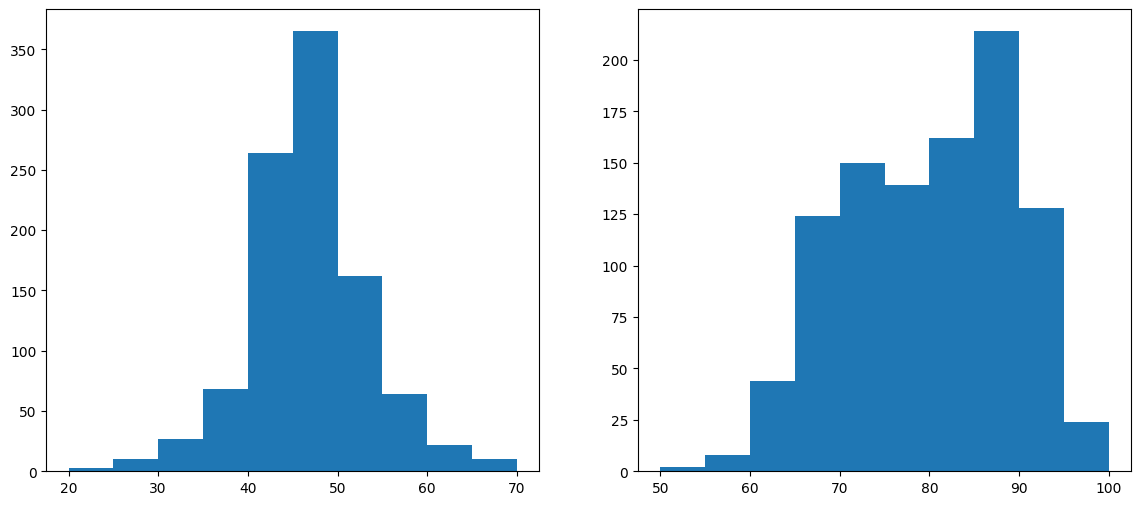

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df['glucose'])
plt.subplot(1,2,2)
plt.hist(df['bloodpressure'])

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('diabetes',axis=1), df['diabetes'])

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9236947791164659


In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

train, test = train_test_split(df, random_state=41)
Y_pred = naive_bayes_categorical(train, test.iloc[:,:-1].values, "diabetes")
print(accuracy_score(y_test, Y_pred))

0.5180722891566265


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [ ]:
cat_columns = ['sex','smoker','region']
num_columns = ['age','bmi']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_data = df[num_columns]
num_data = scaler.fit_transform(df[num_columns])
df[num_columns]= num_data

scaler2 = StandardScaler()
charges = np.array(df['charges']).reshape(-1,1)
charges = scaler2.fit_transform(charges)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,16884.92400
1,-1.509965,1,0.509621,1,0,2,1725.55230
2,-0.797954,1,0.383307,3,0,2,4449.46200
3,-0.441948,1,-1.305531,0,0,1,21984.47061
4,-0.513149,1,-0.292556,0,0,1,3866.85520


### 5. Split the data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), charges, test_size=0.2)

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
params_grid = {
    'kernel':['linear','rbf','poly'],
    'gamma':np.logspace(-3, 3, 6)
}

svr = SVR()
svr_cv =RandomizedSearchCV(svr, params_grid, cv=3)
svr_cv.fit(X_train,y_train)
print(svr_cv.best_score_, svr_cv.best_params_)


0.7517389005213616 {'kernel': 'poly', 'gamma': 0.25118864315095796}


In [ ]:
svr = SVR(kernel='poly', gamma=0.25)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
y_pred= scaler2.inverse_transform(y_pred.reshape(-1,1))
y_test =scaler2.inverse_transform(y_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

2908.894993571832 27834768.351088904


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adbr = AdaBoostRegressor()
param_grid_adaboost = {
     'n_estimators' : [20,40,50,60],
     'loss': ['linear', 'square']
}
from sklearn.model_selection import GridSearchCV

adbr_cv = GridSearchCV(adbr, param_grid_adaboost, cv=3)
adbr_cv.fit(X_train,y_train)
print(adbr_cv.best_estimator_ , adbr_cv.best_params_)

AdaBoostRegressor() {'loss': 'linear', 'n_estimators': 50}


In [ ]:
adbr = AdaBoostRegressor(loss= 'linear', n_estimators=50)
adbr.fit(X_train,y_train)
y_pred = adbr.predict(X_test)
y_pred= scaler2.inverse_transform(y_pred.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

4136.720366880115 23916417.83875084


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred= scaler2.inverse_transform(y_pred.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

2628.2081904852607 21497927.458283424


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)
y_pred= scaler2.inverse_transform(y_pred.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

2347.6300714515587 16723801.183403801


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://xgboost.readthedocs.io/en/stable/get_started.html

In [ ]:
from xgboost import XGBRegressor
bst = XGBRegressor()
bst.fit(X_train, y_train)
y_pred = bst.predict(X_test)

y_pred= scaler2.inverse_transform(y_pred.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

2784.567828357079 23109509.222581886


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/dataset.csv")
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


In [ ]:
df.info()

### 2. Split the data.

In [ ]:
X= df.drop(columns=['index','Result'])
Y= df['Result']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

params_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth':[20,30,50]
}

dtree = DecisionTreeClassifier()
dtree_cv =RandomizedSearchCV(dtree, params_grid, cv=3, scoring='accuracy')
dtree_cv.fit(X_train,y_train)
print(dtree_cv.best_score_, dtree_cv.best_params_)


0.9564676616915423 {'max_depth': 20, 'criterion': 'entropy'}


In [ ]:
dtree = DecisionTreeClassifier(max_depth=20, criterion= 'entropy')
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.9638172772501131


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid_rf = {
    'criterion':['gini','entropy'],
    'max_features':['sqrt', 'log2']
}

from sklearn.model_selection import GridSearchCV
rf_cv = GridSearchCV(rf, param_grid_rf, cv=3)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_estimator_ , rf_cv.best_params_)

RandomForestClassifier(criterion='entropy', max_features='log2') {'criterion': 'entropy', 'max_features': 'log2'}


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_features='log2')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9746720940750792


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier()
adbc.fit(X_train,y_train)
y_pred = adbc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9416553595658074


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

y_pred = gbc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9520578923563998


In [ ]:
from xgboost import XGBClassifier
bst = XGBClassifier()
bst.fit(X_train, y_train)
y_pred = bst.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9710538218000905


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.

### 1. Import the necessary modules

In [ ]:
import numpy as np
import pandas as pd

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [ ]:
data = pd.read_csv("segmentation data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [ ]:
data= data.drop('ID',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
income = np.array(data['Income']).reshape(-1,1)
income = scaler.fit_transform(income)
data['Income'] = income
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,0.097524,1,2
1,1,1,22,1,0.782654,1,2
2,0,0,49,1,-0.833202,0,0
3,0,0,45,1,1.328386,1,1
4,0,0,53,1,0.736932,1,1


In [ ]:
def get_age_category(x):
    ans= (x - (x%10))/10
    return int(ans)

data['Age']= data['Age'].apply(get_age_category)

In [ ]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,6,2,0.097524,1,2
1,1,1,2,1,0.782654,1,2
2,0,0,4,1,-0.833202,0,0
3,0,0,4,1,1.328386,1,1
4,0,0,5,1,0.736932,1,1


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

Text(0.5, 1.0, 'Silhouette Analysis For Optimal k')

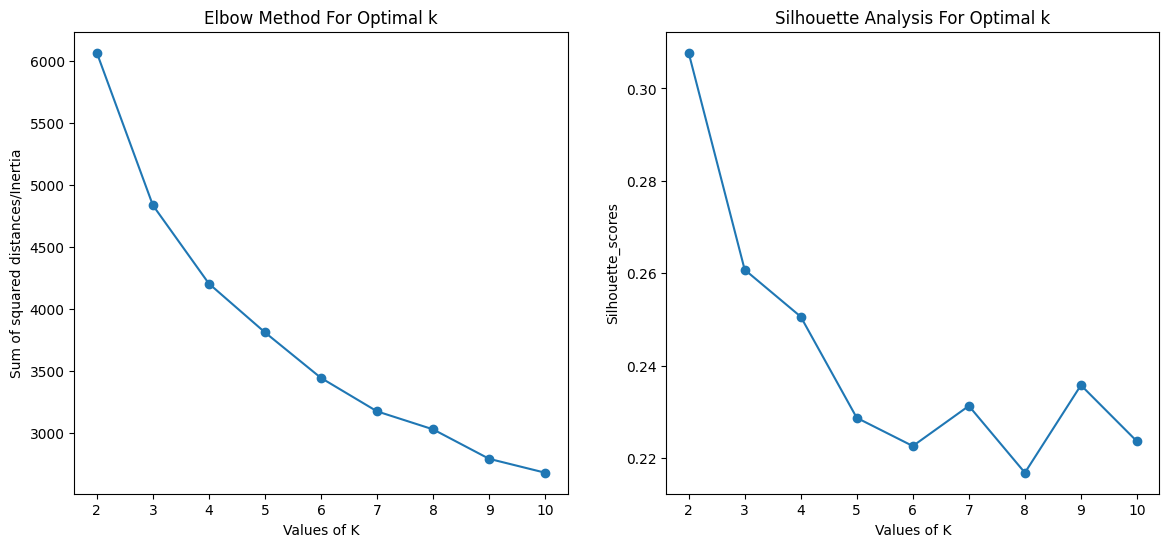

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
Silhouette_scores = []
for num_clusters in range(2,11):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  Sum_of_squared_distances.append(kmeans.inertia_)
  score = silhouette_score(data, kmeans.labels_)
  Silhouette_scores.append(score)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(np.arange(2,11),Sum_of_squared_distances,marker='o')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')

plt.subplot(1,2,2)
plt.plot(np.arange(2,11),Silhouette_scores,marker='o')
plt.xlabel('Values of K')
plt.ylabel('Silhouette_scores')
plt.title('Silhouette Analysis For Optimal k')

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
sklearn_kmeans_inertia = kmeans.inertia_
sklearn_kmeans_labels = kmeans.labels_
sklearn_kmeans_silhoutte_score = silhouette_score(data, kmeans.labels_)

print(sklearn_kmeans_inertia,sklearn_kmeans_silhoutte_score)

4200.743557762544 0.25061100726337965


### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [ ]:
class KMeansScratch:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        n_samples, n_features = X.shape

        self.centroids = np.random.randn(self.k, n_features)

        for i in range(self.max_iter):
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.k)])

            if np.allclose(self.centroids, centroids):
                break

            self.centroids = centroids

        self.labels_ = labels


In [ ]:
kmeans2 = KMeansScratch(k=3,max_iter=100)
kmeans2.fit(np.array(data))
scratch_kmeans_labels = kmeans2.labels_

from sklearn.metrics import accuracy_score
print(accuracy_score(sklearn_kmeans_labels,scratch_kmeans_labels))

0.3035


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [ ]:
from sklearn.cluster import DBSCAN
eps= [0.1,0.2,0.5,1,2]
min_samples=[3,4,5,6]

best_params = {'eps':0,'min_samples':0}
best_score = 0
for min_sample in min_samples:
    for ep in eps:
        dbscan = DBSCAN(eps=ep,min_samples=min_sample)
        dbscan.fit(data)
        if (len(np.unique(dbscan.labels_))==1):
            continue
        score = silhouette_score(data,dbscan.labels_)

        if (score>best_score):
            best_score=score
            best_params['eps']=ep
            best_params['min_samples']=min_sample

print(best_params)
print(best_score)


{'eps': 0.5, 'min_samples': 3}
0.4410647077101175


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [ ]:
import numpy as np

class DBSCANScratch:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        # Initialize labels array
        self.labels_ = np.zeros(X.shape[0])
        cluster_label = 0

        for i in range(X.shape[0]):
            if self.labels_[i] != 0:
                continue

            neighbors = self.get_neighbors(X, i)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1 # Mark as noise point
                continue

            cluster_label += 1
            self.labels_[i] = cluster_label

            # Expand cluster
            j = 0
            while j < len(neighbors):
                neighbor = neighbors[j]

                if self.labels_[neighbor] == -1:
                    self.labels_[neighbor] = cluster_label

                elif self.labels_[neighbor] == 0:
                    self.labels_[neighbor] = cluster_label
                    new_neighbors = self.get_neighbors(X, neighbor)

                    if len(new_neighbors) >= self.min_samples:
                        neighbors = np.concatenate((neighbors, new_neighbors))

                j += 1

        return self

    def get_neighbors(self, X, i):
        distances = np.linalg.norm(X - X[i], axis=1)
        return np.where(distances <= self.eps)[0]


In [ ]:
dbscan2 = DBSCANScratch(eps=0.5,min_samples=3)
dbscan2.fit(np.array(data))
print(silhouette_score(data,dbscan2.labels_))

0.4410647077101175
